In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./framingham.csv')

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


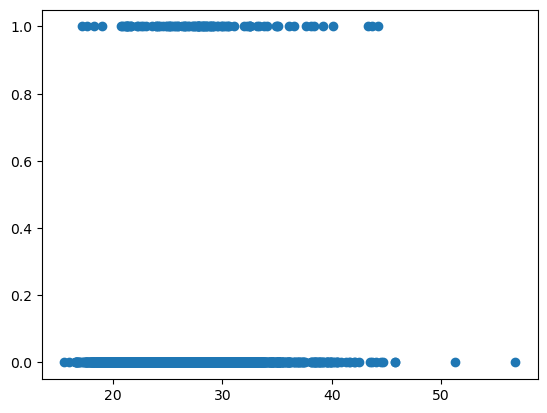

In [4]:
# Mostramos la relación de ambos datos BMI y diabetes
train = data[['BMI','diabetes']]
plt.scatter(train['BMI'], train['diabetes'])

In [5]:
train_cp = train.copy()
train_cp.dropna(subset=['BMI'], inplace=True)
x = train_cp['BMI'].values.reshape(-1,1)
y = train_cp['diabetes'].values

In [6]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [7]:
print('Intercepto: ', model.intercept_)
print('Pendiente: ' , model.coef_)
w = model.coef_
b = model.intercept_
#w = 0.09
#b = -3.6

Intercepto:  [-6.49903757]
Pendiente:  [[0.1064929]]


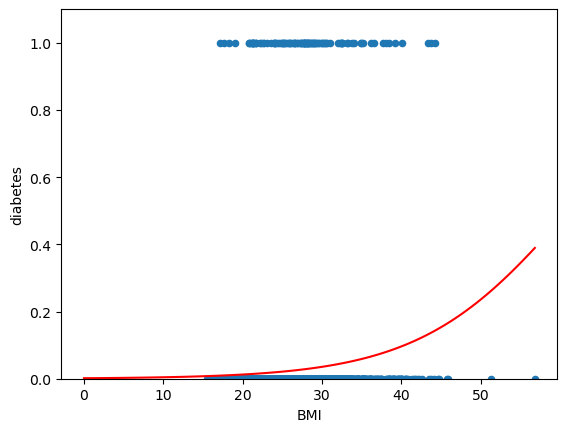

In [8]:
x = np.linspace(0,train['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b))).reshape(-1,1)


train.plot.scatter(x='BMI',y='diabetes')
plt.plot(x,y,c='red')
plt.ylim(0,train['diabetes'].max()*1.1)
plt.show()